In [1]:
import pandas as pd
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Load data
data = pd.read_csv('data/processed/averages/last_10_games.csv')
data.head()

,game_id,game_date,home_team,away_team,result,last_10_games_home_score,last_10_games_home_score_q1,last_10_games_home_score_q1_allow,last_10_games_home_score_q2,last_10_games_home_score_q2_allow,...,last_10_games_away_off_pass_cmp_perc,last_10_games_away_def_tackles,last_10_games_away_def_sacks,last_10_games_away_def_interceptions,last_10_games_away_def_forced_fumbles,last_10_games_away_def_fumble_recoveries,last_10_games_away_def_defense_qbhit,last_10_games_away_def_defense_safety,last_10_games_home_number_of_wins,last_10_games_away_number_of_wins
0,2009091000,2009-09-10,PIT,TEN,home_win,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,2009091303,2009-09-13,CIN,DEN,away_win,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,2009091304,2009-09-13,CLE,MIN,away_win,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,2009091308,2009-09-13,TB,DAL,away_win,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,2009091305,2009-09-13,HOU,NYJ,away_win,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [3]:
#drop rows where last_10_games_home_score or last_10_games_away_score is null or 0
data = data.dropna(subset=['last_10_games_home_score', 'last_10_games_away_score'])
data = data[(data['last_10_games_home_score'] != 0) & (data['last_10_games_away_score'] != 0)]

data.head()

,game_id,game_date,home_team,away_team,result,last_10_games_home_score,last_10_games_home_score_q1,last_10_games_home_score_q1_allow,last_10_games_home_score_q2,last_10_games_home_score_q2_allow,...,last_10_games_away_off_pass_cmp_perc,last_10_games_away_def_tackles,last_10_games_away_def_sacks,last_10_games_away_def_interceptions,last_10_games_away_def_forced_fumbles,last_10_games_away_def_fumble_recoveries,last_10_games_away_def_defense_qbhit,last_10_games_away_def_defense_safety,last_10_games_home_number_of_wins,last_10_games_away_number_of_wins
33,2009092706,2009-09-27,PHI,KC,home_win,58.0,10.0,17.0,42.0,10.0,...,117.795845,89.0,3.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0
34,2009092700,2009-09-27,BAL,CLE,home_win,69.0,17.0,10.0,31.0,12.0,...,103.928571,89.0,4.0,0.0,1.0,0.0,9.0,0.0,2.0,0.0
35,2009092711,2009-09-27,NYJ,TEN,home_win,40.0,3.0,3.0,13.0,6.0,...,122.875817,82.0,4.0,2.0,3.0,0.0,14.0,0.0,2.0,0.0
36,2009092702,2009-09-27,DET,WAS,home_win,39.0,6.0,14.0,20.0,21.0,...,127.679404,58.0,2.0,1.0,3.0,0.0,9.0,0.0,0.0,1.0
37,2009092703,2009-09-27,HOU,JAC,away_win,40.0,7.0,17.0,24.0,17.0,...,97.212032,85.0,1.0,1.0,4.0,0.0,3.0,0.0,1.0,0.0


In [4]:
#Map result to 1 for home win, 0 for tie, -1 for away win
data['result'] = data['result'].map({'home_win': 1, 'tie': 0, 'away_win': -1})

In [5]:
#adding additional features like average point_diff
data['average_point_diff'] = data['last_10_games_home_score'] - data['last_10_games_away_score']


In [6]:
import warnings
warnings.filterwarnings('ignore')

def preprocess_data(post_priori: pd.DataFrame, target_column: str, k_features_10: int = 10, k_features_25: int = 25) -> dict:
    """
    Preprocess the dataset by removing first 10 weeks of 2009 season, selecting top k features,
    encoding categorical variables, and scaling numerical data.
    
    Args:
        post_priori (pd.DataFrame): The post-priori dataset containing NFL game data.
        target_column (str): The name of the column containing the target variable (binary outcome).
        k_features_10 (int): Number of top features to select for the smaller dataset (default is 10).
        k_features_25 (int): Number of top features to select for the larger dataset (default is 25).
        
    Returns:
        dict: A dictionary containing two preprocessed datasets (with top 10 and top 25 features).
    """
    
    # Step 1: Remove first 10 weeks of the 2009 season
    post_priori['game_date'] = pd.to_datetime(post_priori['game_date'])
    print(post_priori.shape)
    # Step 2: Separate features and target
    X = post_priori.drop(columns=[target_column]).select_dtypes(include=['number'])
    X = X.drop(columns=['game_id'])
    X.fillna(0, inplace=True)
    y = post_priori[target_column]
    
    # Step 3: Scale numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Step 4: Feature selection - Select top k features based on correlation with target
    selector_10 = SelectKBest(f_classif, k=k_features_10)
    X_top_10 = selector_10.fit_transform(X_scaled, y)
    
    selector_25 = SelectKBest(f_classif, k=k_features_25)
    X_top_25 = selector_25.fit_transform(X_scaled, y)
    
    print(X_top_10.shape)
    print(X_top_25.shape)
    # Step 5: Return two datasets - one with top 10 features and one with top 25 features
    return {
        'all_features': pd.DataFrame(X_scaled, columns=X.columns),
        'top_10_features': pd.DataFrame(X_top_10, columns=X.columns[selector_10.get_support()]),
        'top_25_features': pd.DataFrame(X_top_25, columns=X.columns[selector_25.get_support()]),
        'target': y
    }

# Example usage
# Assuming you have loaded your data into a DataFrame called `post_priori`
# and your target column is called 'result' (binary outcome)
preprocessed_data = preprocess_data(data, target_column='result')

# Access the datasets
all_features_df = preprocessed_data['all_features']
top_10_features_df = preprocessed_data['top_10_features']
top_25_features_df = preprocessed_data['top_25_features']
target = preprocessed_data['target']

# Display the resulting datasets
print("Top 10 Features Dataset:")
print(top_10_features_df.columns)

print("Top 25 Features Dataset:")
print(top_25_features_df.columns)

(2469, 106)
(2469, 10)
(2469, 25)
Top 10 Features Dataset:
Index(['last_10_games_home_score', 'last_10_games_home_score_q3',
       'last_10_games_home_score_q4',
       'last_10_games_home_score_last_2_minutes_q4',
       'last_10_games_away_score', 'last_10_games_away_score_q3',
       'last_10_games_away_score_q4',
       'last_10_games_away_score_last_2_minutes_q4',
       'last_10_games_home_number_of_wins', 'average_point_diff'],
      dtype='object')
Top 25 Features Dataset:
Index(['last_10_games_home_score', 'last_10_games_home_score_q2',
       'last_10_games_home_score_q3', 'last_10_games_home_score_q4',
       'last_10_games_home_third_down_conv_perc',
       'last_10_games_home_total_turnovers',
       'last_10_games_home_total_first_downs',
       'last_10_games_home_yards_gained',
       'last_10_games_home_score_last_2_min_q2',
       'last_10_games_home_score_last_2_minutes_q4',
       'last_10_games_home_off_tot_pass_tds',
       'last_10_games_home_off_pass_cmp_perc',

In [7]:
#use random forest to predict the outcome of the game, first split the data into training i.e. till 2017 and test data i.e. 2018
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = top_25_features_df
y = target

# Split the data into training and test sets by taking the last 1000 rows as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, shuffle=False)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.62


In [8]:
#random forest model with top 10 features
X = top_10_features_df
y = target

# Split the data into training and test sets by taking the last 1000 rows as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, shuffle=False)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.61


In [9]:
#random forest model with all the features
X = all_features_df
y = target

# Split the data into training and test sets by taking the last 1000 rows as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, shuffle=False)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.61


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=3):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Define an RNN with tanh activation
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='tanh')
        
        # Fully connected layer to map from hidden state space to output space
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate RNN
        out, _ = self.rnn(x, h0)
        
        # Pass through fully connected layer (only last time step)
        out = self.fc(out[:, -1, :])
        return out

# Function to train the RNN model
def train_rnn_model(X_train, y_train, X_test, y_test):
    input_size = X_train.shape[1]  # Number of features (25 in this case)
    hidden_size = 25               # Hidden layer size (25 units)
    output_size = 3                # Three classes: home win (1), tie (0), away win (-1)
    num_layers = 3                 # Number of layers
    
    # Initialize the model
    model = RNNModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()  # Multi-class classification loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train.values).float()
    y_train_tensor = torch.tensor(y_train.values).long()  # Use long for multi-class labels
    
    X_test_tensor = torch.tensor(X_test.values).float()
    y_test_tensor = torch.tensor(y_test.values).long()

    num_epochs = 100
    batch_size = 1969
    
    for epoch in range(num_epochs):
        model.train()
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(X_train_tensor.unsqueeze(1))  # Add extra dimension for sequence length (batch_first=True)
        
        loss = criterion(outputs, y_train_tensor)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # Evaluate the model on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor.unsqueeze(1))
        test_loss = criterion(test_outputs, y_test_tensor)
    
    print(f'Test Loss: {test_loss.item():.4f}')
    
# Main function to load data and run the model
def main():
    # Load your top 25 features dataset (assuming it's a CSV file)
    
    # Assume the last column is the target variable (binary outcome: win/loss)
    X = top_25_features_df   # Features (first 24 columns)
    y = target   # Target variable (last column)

    # Remap target values (-1 -> 0 for away win, 0 -> 1 for tie, and 1 -> 2 for home win)
    y_mapped = y.map({-1: 0, 0: 1, 1: 2})

    # Split into training and testing sets (use last 500 rows for testing)
    X_train = X.iloc[:-500]
    y_train = y_mapped.iloc[:-500]
    
    X_test = X.iloc[-500:]
    y_test = y_mapped.iloc[-500:]

    print("Training RNN Model...")
    
    # Train the RNN model and evaluate it on the test set
    train_rnn_model(X_train, y_train, X_test, y_test)

if __name__ == "__main__":
    main()

Training RNN Model...
Epoch [10/100], Loss: 0.9298
Epoch [20/100], Loss: 0.8494
Epoch [30/100], Loss: 0.7891
Epoch [40/100], Loss: 0.7381
Epoch [50/100], Loss: 0.7022
Epoch [60/100], Loss: 0.6805
Epoch [70/100], Loss: 0.6681
Epoch [80/100], Loss: 0.6610
Epoch [90/100], Loss: 0.6566
Epoch [100/100], Loss: 0.6537
Test Loss: 0.6788


In [67]:
# Add identifier columns to each dataframe
identifiers = data[['game_id', 'game_date', 'home_team', 'away_team', 'result']]

top_25_features_df_with_id = pd.concat([identifiers, top_25_features_df], axis=1)
top_10_features_df_with_id = pd.concat([identifiers, top_10_features_df], axis=1)
all_features_df_with_id = pd.concat([identifiers, all_features_df], axis=1)

# Save the dataframes to CSV files
top_25_features_df_with_id.to_csv('data/processed/averages/top_25_features.csv', index=False)
top_10_features_df_with_id.to_csv('data/processed/averages/top_10_features.csv', index=False)
all_features_df_with_id.to_csv('data/processed/averages/all_features.csv', index=False)
target.to_csv('data/processed/averages/target.csv', index=False)



In [13]:
# For Random Forest hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Function for Random Forest tuning
def tune_random_forest(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print("Best Random Forest Parameters:", grid_search.best_params_)
    print("Best CV Score:", grid_search.best_score_)
    
    # Test set performance
    y_pred = grid_search.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Set Accuracy:", test_accuracy)
    
    return grid_search.best_estimator_

# For RNN hyperparameter tuning and accuracy output
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, 
                            batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.fc = nn.Linear(hidden_size, 3)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

def train_rnn_model(X_train, y_train, X_test, y_test, params):
    # Model parameters
    input_size = X_train.shape[1]
    hidden_size = params['hidden_size']
    num_layers = params['num_layers']
    dropout = params['dropout']
    learning_rate = params['learning_rate']
    num_epochs = params['num_epochs']
    
    # Initialize model
    model = RNNModel(input_size, hidden_size, num_layers, dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Convert data to tensors
    X_train_tensor = torch.FloatTensor(X_train.values).unsqueeze(1)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_test_tensor = torch.FloatTensor(X_test.values).unsqueeze(1)
    y_test_tensor = torch.LongTensor(y_test.values)
    
    # Training loop
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        loss.backward()
        optimizer.step()
        
        # Calculate accuracies
        model.eval()
        with torch.no_grad():
            # Training accuracy
            train_pred = torch.argmax(outputs, dim=1)
            train_acc = (train_pred == y_train_tensor).float().mean()
            train_accuracies.append(train_acc.item())
            
            # Test accuracy
            test_outputs = model(X_test_tensor)
            test_pred = torch.argmax(test_outputs, dim=1)
            test_acc = (test_pred == y_test_tensor).float().mean()
            test_accuracies.append(test_acc.item())
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}]')
            print(f'Loss: {loss.item():.4f}')
            print(f'Train Accuracy: {train_acc:.4f}')
            print(f'Test Accuracy: {test_acc:.4f}')
    
    return model, train_accuracies, test_accuracies

# RNN parameter grid
rnn_param_grid = {
    'hidden_size': [25, 50, 100],
    'num_layers': [1, 2, 3],
    'dropout': [0.0, 0.2, 0.4],
    'learning_rate': [0.001, 0.01],
    'num_epochs': [100]
}

# Function to perform grid search for RNN
def tune_rnn(X_train, y_train, X_test, y_test):
    best_acc = 0
    best_params = None
    best_model = None
    
    for hidden_size in rnn_param_grid['hidden_size']:
        for num_layers in rnn_param_grid['num_layers']:
            for dropout in rnn_param_grid['dropout']:
                for lr in rnn_param_grid['learning_rate']:
                    params = {
                        'hidden_size': hidden_size,
                        'num_layers': num_layers,
                        'dropout': dropout,
                        'learning_rate': lr,
                        'num_epochs': rnn_param_grid['num_epochs'][0]
                    }
                    
                    print(f"\nTrying parameters: {params}")
                    model, train_acc, test_acc = train_rnn_model(X_train, y_train, X_test, y_test, params)
                    
                    if test_acc[-1] > best_acc:
                        best_acc = test_acc[-1]
                        best_params = params
                        best_model = model
    
    print("\nBest RNN Parameters:", best_params)
    print("Best Test Accuracy:", best_acc)
    
    return best_model, best_params, best_acc

# Main execution
# Load and preprocess data as before
X = top_25_features_df
y = target.map({-1: 0, 0: 1, 1: 2})

# Split data
X_train = X.iloc[:-500]
y_train = y.iloc[:-500]
X_test = X.iloc[-500:]
y_test = y.iloc[-500:]

print("Tuning Random Forest...")
best_rf = tune_random_forest(X_train, y_train, X_test, y_test)




Tuning Random Forest...
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.6312705855000582
Test Set Accuracy: 0.642


In [14]:
print("\nTuning RNN...")
best_rnn, best_params, best_acc = tune_rnn(X_train, y_train, X_test, y_test)



Tuning RNN...

Trying parameters: {'hidden_size': 25, 'num_layers': 1, 'dropout': 0.0, 'learning_rate': 0.001, 'num_epochs': 100}
Epoch [10/100]
Loss: 1.0112
Train Accuracy: 0.5998
Test Accuracy: 0.6080
Epoch [20/100]
Loss: 0.9540
Train Accuracy: 0.6267
Test Accuracy: 0.6180
Epoch [30/100]
Loss: 0.9165
Train Accuracy: 0.6313
Test Accuracy: 0.6240
Epoch [40/100]
Loss: 0.8853
Train Accuracy: 0.6359
Test Accuracy: 0.6260
Epoch [50/100]
Loss: 0.8556
Train Accuracy: 0.6303
Test Accuracy: 0.6280
Epoch [60/100]
Loss: 0.8278
Train Accuracy: 0.6343
Test Accuracy: 0.6260
Epoch [70/100]
Loss: 0.8023
Train Accuracy: 0.6384
Test Accuracy: 0.6280
Epoch [80/100]
Loss: 0.7793
Train Accuracy: 0.6389
Test Accuracy: 0.6260
Epoch [90/100]
Loss: 0.7589
Train Accuracy: 0.6389
Test Accuracy: 0.6280
Epoch [100/100]
Loss: 0.7411
Train Accuracy: 0.6379
Test Accuracy: 0.6280

Trying parameters: {'hidden_size': 25, 'num_layers': 1, 'dropout': 0.0, 'learning_rate': 0.01, 'num_epochs': 100}
Epoch [10/100]
Loss: 0.

Random Forest Results:


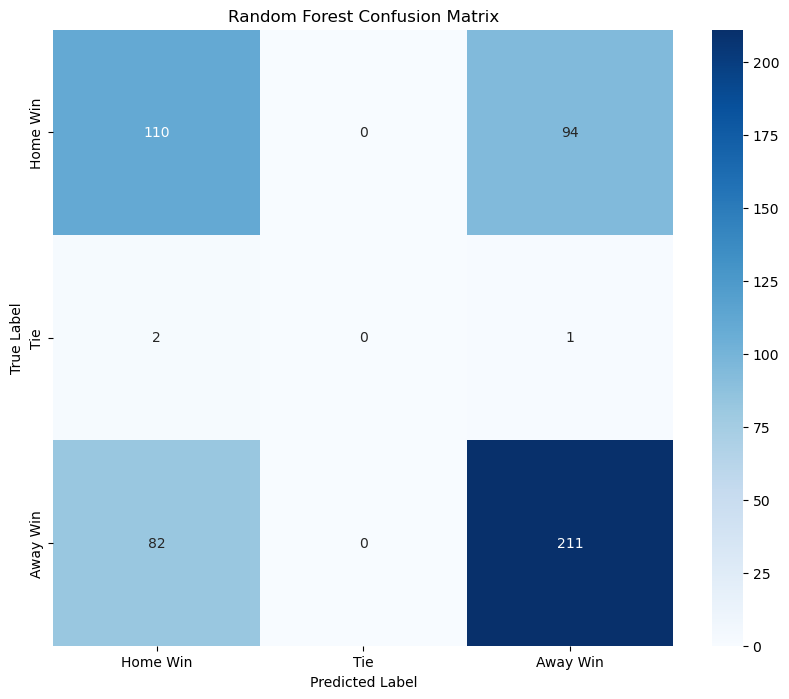


Random Forest Classification Report:
              precision    recall  f1-score   support

    Home Win       0.57      0.54      0.55       204
         Tie       0.00      0.00      0.00         3
    Away Win       0.69      0.72      0.70       293

    accuracy                           0.64       500
   macro avg       0.42      0.42      0.42       500
weighted avg       0.64      0.64      0.64       500


RNN Results:


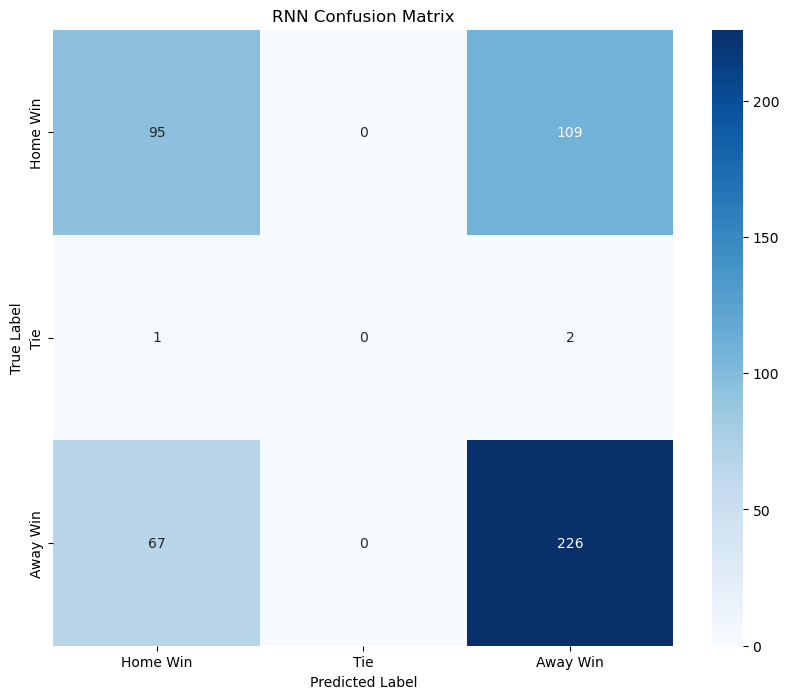


RNN Classification Report:
              precision    recall  f1-score   support

    Home Win       0.58      0.47      0.52       204
         Tie       0.00      0.00      0.00         3
    Away Win       0.67      0.77      0.72       293

    accuracy                           0.64       500
   macro avg       0.42      0.41      0.41       500
weighted avg       0.63      0.64      0.63       500



In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, title, labels=['Home Win', 'Tie', 'Away Win']):
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# For Random Forest
def plot_rf_results(X_test, y_test, best_rf_model):
    # Make predictions
    y_pred = best_rf_model.predict(X_test)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, 'Random Forest Confusion Matrix')
    
    # Print classification report
    print("\nRandom Forest Classification Report:")
    print(classification_report(y_test, y_pred, 
                            target_names=['Home Win', 'Tie', 'Away Win']))

# For RNN
def plot_rnn_results(history, epochs):
    plt.figure(figsize=(15,5))
    
    # Plot accuracy
    plt.subplot(1,2,1)
    plt.plot(range(epochs), history['train_acc'], label='Train Accuracy')
    plt.plot(range(epochs), history['val_acc'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1,2,2)
    plt.plot(range(epochs), history['train_loss'], label='Train Loss')
    plt.plot(range(epochs), history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_rnn_confusion_matrix(X_test, y_test, best_rnn_model):
    # Convert data to tensor if not already
    if not torch.is_tensor(X_test):
        X_test = torch.FloatTensor(X_test.values).unsqueeze(1)  # Add .values and unsqueeze
    
    # Get predictions
    best_rnn_model.eval()
    with torch.no_grad():
        outputs = best_rnn_model(X_test)
        _, predicted = torch.max(outputs.data, 1)
    
    # Convert predictions to numpy if they're tensors
    if torch.is_tensor(predicted):
        predicted = predicted.cpu().numpy()
    if torch.is_tensor(y_test):
        y_test = y_test.numpy()
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, predicted)
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, 'RNN Confusion Matrix')
    
    # Print classification report
    print("\nRNN Classification Report:")
    print(classification_report(y_test, predicted,
                            target_names=['Home Win', 'Tie', 'Away Win']))

# Main execution
def main():
    # Assuming you have your best models and test data ready
    
    # For Random Forest
    print("Random Forest Results:")
    plot_rf_results(X_test, y_test, best_rf)
    
    # For RNN
    print("\nRNN Results:")
    plot_rnn_confusion_matrix(X_test, y_test, best_rnn)
    
    # Plot RNN training history
    #plot_rnn_results(history, 100)

if __name__ == "__main__":
    main()


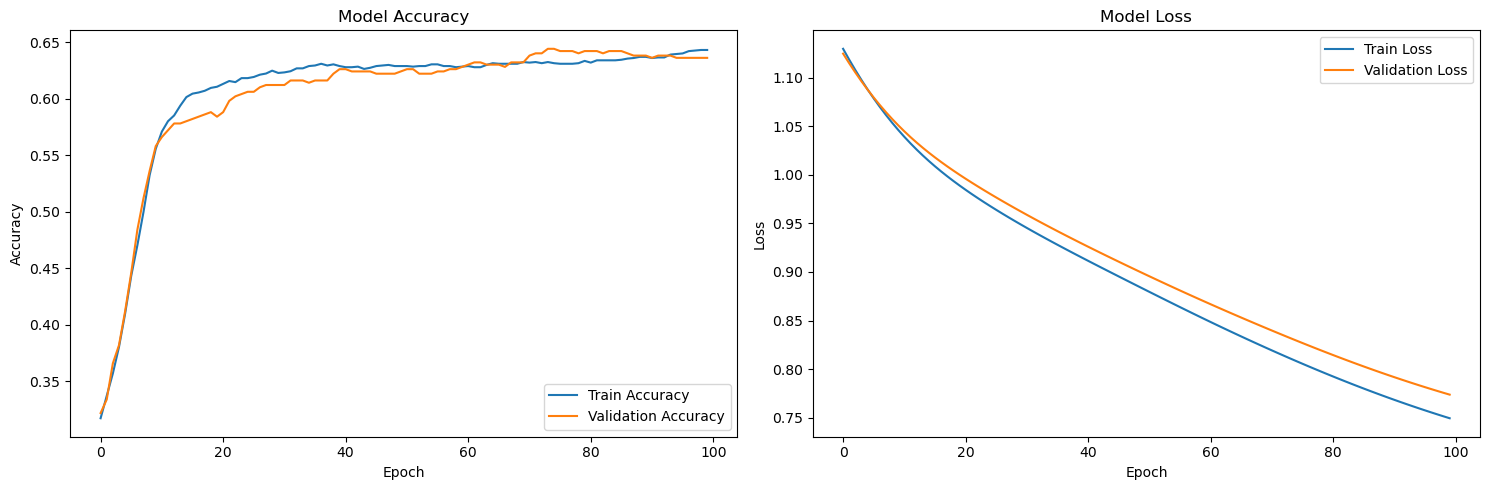

In [19]:
def train_rnn_model(X_train, y_train, X_test, y_test, params):
    # Model parameters
    input_size = X_train.shape[1]
    hidden_size = params['hidden_size']
    num_layers = params['num_layers']
    dropout = params['dropout']
    learning_rate = params['learning_rate']
    num_epochs = params['num_epochs']
    
    # Initialize model
    model = RNNModel(input_size, hidden_size, num_layers, dropout)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Convert data to tensors
    X_train_tensor = torch.FloatTensor(X_train.values).unsqueeze(1)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_test_tensor = torch.FloatTensor(X_test.values).unsqueeze(1)
    y_test_tensor = torch.LongTensor(y_test.values)
    
    # Training history
    history = {
        'train_acc': [],
        'val_acc': [],
        'train_loss': [],
        'val_loss': []
    }
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        loss.backward()
        optimizer.step()
        
        # Calculate accuracies
        model.eval()
        with torch.no_grad():
            # Training accuracy
            train_pred = torch.argmax(outputs, dim=1)
            train_acc = (train_pred == y_train_tensor).float().mean()
            
            # Test accuracy
            test_outputs = model(X_test_tensor)
            test_pred = torch.argmax(test_outputs, dim=1)
            test_acc = (test_pred == y_test_tensor).float().mean()
            test_loss = criterion(test_outputs, y_test_tensor)
        
        # Store history
        history['train_acc'].append(train_acc.item())
        history['val_acc'].append(test_acc.item())
        history['train_loss'].append(loss.item())
        history['val_loss'].append(test_loss.item())
        
    return model, history

# In main():
model, history = train_rnn_model(X_train, y_train, X_test, y_test, best_params)
plot_rnn_results(history, best_params['num_epochs'])
